\title{(some) LaTeX environments \par for Jupyter notebook}
\author{@jfbercher}
\maketitle

# Introduction

This extension for IPython 4.x or Jupyter enables to use some LaTeX commands and environments in the notebook's markdown cells. 
\begin{enumerate}
\item **LaTeX commands and environments**
\begin{itemize}
\item support for some LaTeX commands within markdown cells, *e.g.* `\textit`, `\textbf`, `\underline`, `author`, `\title`, LaTeX comments
\item support for **theorems-like environments**, support for labels and **cross references**
\item support for **lists**: *enumerate, itemize*,  
\item limited support for a **figure environment**,
\item support for an environment *listing*,
\item additional *textboxa* environment
\end{itemize}
\item **Citations and bibliography**
\begin{itemize}
\item support for `\cite` with creation of a References section
\end{itemize}
\item it is possible mix markdown and LaTeX markup
\item **Document-wide numbering of equations and environments, support for `\label` and `\ref`**
\item **Configuration toolbar**
\item **LaTeX_envs dropdown menu for a quick insertion of environments**
\item Support for **User $\LaTeX$ definitions file** 
\item Environments title/numbering can be customized by users in ``user_envs.json`` config file
\item **Export to HTML and LaTeX with a customized exporter**
\item Styles can be customized in the `latex_env.css` stylesheet
\item Limited **autocompletion** for \$, (, {, [ 
\end{enumerate}

A simple illustration is as follows: one can type the following in a markdown cell
\begin{listing}
The dot-product is defined by equation (\ref{eq:dotp}) in theorem \ref{theo:dotp} just below:
\begin{theorem}[Dot Product] \label{theo:dotp}
Let $u$ and $v$ be two vectors of $\mathbb{R}^n$. The dot product can be expressed as
\begin{equation}
\label{eq:dotp}
u^Tv = |u||v| \cos \theta,
\end{equation}
where $\theta$ is the angle between $u$ and $v$ ...
\end{theorem}
\end{listing}
and have it rendered as

The dot-product is defined by equation (\ref{eq:dotp}) in theorem \ref{theo:dotp} just below:
\begin{theorem}[Dot Product] \label{theo:dotp}
Let $u$ and $v$ be two vectors of $\mathbb{R}^n$. The dot product can be expressed as
\begin{equation}
\label{eq:dotp}
u^Tv = |u||v| \cos \theta,
\end{equation}
where $\theta$ is the angle between $u$ and $v$ ...
\end{theorem}

## ** What's new **

**February 9, 2017** - version 1.3.7

- Enable customizing hotkeys for inserting environments (via `nbextensions_configurator`)
- LaTeX\_envs menu can be customized by editing `envsLatex.json` in `nbextensions/latex_envs` directory)
- Autocompletion for \$,(,{,[
- Updates to ensure compatibility with nbTranslate
- Recognize \\ [..\\ ] and \\ (..\\ ) as LaTeX equations delimiters in nb

**November 2, 2016** - version 1.3.1

- Support for **user environments configuration** file (`user_envs.json` in `nbextensions/latex\_envs` directory). This file is included by the html export template.  
- Support for **book/report style numbering** of environments, e.g. "Example 4.2" is example 2 in section 4. 
- Support for `\author`, `\title`, and `maketitle`. Author and title are saved in notebook metadata, used in html/latex exports. The maketitle command also formats a title in the LiveNotebook.  
- Added a Toogle menu in the config toolbar to:
    - toggle use of user's environments config file
    - toggle `report-style` numbering


**September 18, 2016** - version 1.3

- Support for **user personal LaTeX definitions** file (`latexdefs.tex` in current directory). This file is included by the html and latex export templates.  
- Style for nested enumerate environments added in `latex_envs.css`
- Added a Toogle menu in the config toolbar to: 
    - toggle the display of the LaTeX_envs dropdown menu, 
    - toggle the display of labels keys, 
    - toggle use of user's LaTeX definition file
- **Cross references now use the true environment number instead of the reference//label key**. **References are updated immediately**. This works **document wide** and works for pre and post references
- Support for optional parameters in theorem-like environments
- Support for spacings in textmode, eg `\par`, `\vspace, \hspace`
- Support for LaTeX comments % in markdown cells
- Reworked loading and merging of system/document configuration parameters

**August 28, 2016** - version 1.2

- **Added support for nested environments of the same type**. Nesting environments of different type was already possible, but there was a limitation for nesting environments of the same kind; eg itemize in itemize in itemize. This was due to to the fact that regular expressions are not suited to recursivity. I have developped a series of functions that enable to extract nested environments and thus cope with such situations. 

- Corrected various issues, eg [#731](https://github.com/ipython-contrib/jupyter_contrib_nbextensions/issues/731), [#720](https://github.com/ipython-contrib/jupyter_contrib_nbextensions/issues/720) where the content of nested environments was incorrectly converted to markdown. 

- Completely reworked the configuration toolbar. Re-added tips.
- Added a toggle-button for the LaTeX\_envs menu
- Added system parameters that can be specified using the [nbextensions_configurator](https://github.com/Jupyter-contrib/jupyter_nbextensions_configurator/tree/master/src/jupyter_nbextensions_configurator/static/nbextensions_configurator). Thus reworked the configuration loading/saving. 
- Reworked extension loading. It now detects if the notebook is fully loaded before loading itself.


**August 03, 2016** - version 1.13

- Added a template to also keep the toc2 features when exporting to html:
```
jupyter nbconvert --to html_toclenvs FILE.ipynb
```
- Added a dropdown menu that enables to insert all main LaTeX\_envs environments using a simple click. Two keybards shortcuts (Ctrl-E and Ctrl-I) for equations and itemize are also provided. More environments and shortcuts can be added in the file `envsLatex.js`.

- Added a link in the general help menu that points to the documentation. 


**July 27, 2016** - version 1.1

- In this version I have reworked **equation numbering**. In the previous version, I used a specialized counter and detected equations rendering for updating this counter. Meanwhile, this feature has been introduced in `MathJax` and now we rely on MathJax implementation. rendering is significantly faster. We still have keep the capability of displaying only equation labels (instead of numbers). The numbering is automatically updated and is document-wide.
- I have completely reworked the **notebook conversion** to plain $\LaTeX$ and html. We provide specialized exporters, pre and post processors, templates. We also added entry-points to simplify the conversion process. It is now as simple as
```bash
jupyter nbconvert --to html_with_lenvs FILE.ipynb
```
to convert `FILE.ipynb` into html while keeping all the features of the `latex_envs` notebook extension in the converted version. 


# Main features
## Implementation principle

The main idea is to override the standard Markdown renderer in order to add a *small* parsing of LaTeX expressions and environments. This heavily uses regular expressions. The LaTeX expression are then rendered using an html version. For instance `\underline {something}` is rendered as `<u> something </u>`, that is \underline{something}. The environments are replaced by an html tag with a class derived from the name of the environment. For example, a `definition` denvronment will be replaced by an html rendering corresponding to the class `latex_definition`. The styles associated with the different classes are specified in `latex_env.css`. These substitutions are implemented in `thsInNb4.js`.

## Support for simple LaTeX commands

We also added some LaTeX commands (e.g. `\textit`, `\textbf`, `\underline`) -- this is useful in the case of copy-paste from a LaTeX document. The extension also supports some textmode spacings, namely `\par`, `\vspace, \hspace` as well as `\title`, `\author`, `maketitle` and  LaTeX comments % in markdown cells. Labels and cross-references are supported, including for equations.

## Available environments

- **theorems-like environments**: *property, theorem, lemma, corollary, proposition, definition,remark, problem,           exercise, example*,
- **lists**: *enumerate, itemize*,  
- limited support for a *figure* environment,
- an environment *listing*,
- *textboxa*, wich is a `textbox` environment defined as a demonstration (see below).

More environments can be added easily in the user\_envs config file `user_envs.json` or directly in the javascript source file `thmsInNb4.js`. The rendering is done according to the stylesheet `latex_env.css`, which can be customized.
\begin{remark}
When exporting to html, the `latex_env.css` file honored is the file on the github CDN. However, customized css can be added in a `custom.css` file that must reside in the same directory as the notebook itself. The reason for that is that the `css` file must be in the same directory as the notebook file for inclusion, which means copying it in each working directory. As the rendering of the html file obtained is done using the original javascript code, the same is true for the source files; therefore it is better to curstomize environments in  `user_envs.json` which is taken into account when exporting to html.  
\end{remark}

## Automatic numerotation, labels and references 

Several counters for numerotation are implemented: counters for         problem, exercise, example, property, theorem, lemma, corollary, proposition, definition, remark, and figure are available. 
Mathjax-equations with a label are also numbered document-wide. 
An anchor is created for any label which enables to links things within the document: `\label` and `\ref` are both supported. A limitation was that numbering was updated (incremented) each time a cell is rendered. Document-wide automatic updating is implemented since version 1.3. A toolbar button is provided to reset the counters and refresh the rendering of the whole document (this is still useful for citations and bibliography refresh).

\label{example:mixing} A simple example is as follows, featuring automatic numerotation, and the use of labels and references. Also note that standard markdown can be present in the environment and is interpreted. 
*The rendering is done according to the stylesheet `latex_env.css`, which of course, can be customized to specific uses and tastes*.  

\begin{listing}
\begin{definition} \label{def:FT}
Let $x[n]$ be a sequence of length $N$. Then, its **Fourier transform** is given by
\begin{equation}
\label{eq:FT}
X[k]= \frac{1}{N} \sum_{n=0}^{N-1} x[n] e^{-j2\pi \frac{kn}{N}}
\end{equation}
\end{definition}
\end{listing}


\begin{definition} \label{def:FT}
Let $x[n]$ be a sequence of length $N$. Then, its **Fourier transform** is given by
\begin{equation}
\label{eq:FT2}
X[k]= \frac{1}{N} \sum_{n=0}^{N-1} x[n] e^{-j2\pi \frac{kn}{N}}
\end{equation}
\end{definition}

It is now possible to refer to the definition and to the equation by their labels,  as in:
\begin{listing}
As an example of Definition \ref{def:FT}, consider the Fourier transform (\ref{eq:FT2}) of a pure cosine wave given by
$$
x[n]= \cos(2\pi k_0 n/N),
$$
where $k_0$ is an integer. 
\end{listing}

As an example of Definition \ref{def:FT}, consider the Fourier transform (\ref{eq:FT2}) of a pure cosine wave given by
$$
x[n]= \cos(2\pi k_0 n/N),
$$
where $k_0$ is an integer. 
Its Fourier transform is given by 
$$
X[k] = \frac{1}{2} \left( \delta[k-k_0] + \delta[k-k_0] \right), 
$$
modulo $N$. 

## Bibliography

### Usage

It is possible to cite bibliographic references using the standard LaTeX `\cite` mechanism. The extension looks for the references in a bibTeX file, by default `biblio.bib` in the same directory as the notebook. The name of this file can be modified in the configuration toolbar. It is then possible to cite works in the notebook, e.g. 
\begin{listing}
The main paper on IPython is definitively \cite{PER-GRA:2007}. Other interesting references are certainly \cite{mckinney2012python, rossant2013learning}. Interestingly, a presentation of the IPython notebook has also be published recently in Nature \cite{shen2014interactive}.
\end{listing}
The main paper on IPython is definitively \cite{PER-GRA:2007}. Other interesting references are certainly \cite{mckinney2012python, rossant2013learning}. Interestingly, a presentation of the IPython notebook has also be published recently in Nature \cite{shen2014interactive}.

### Implementation

The implemention uses several snippets from the nice [icalico-document-tools](https://bitbucket.org/ipre/calico/downloads/) extension that also considers the rendering of citations in the notebook. We also use a modified version of the [bibtex-js](https://code.google.com/p/bibtex-js/) parser for reading the references in the bibTeX file. The different functions are implemented in `bibInNb4.js`. The rendering of citations calls can adopt three styles (Numbered, by key or apa-like) -- this can be selected in the configuration toolbar. It is also possible to customize the rendering of references in the reference list. A citation template is provided in the beginning of file `latex_envs.js`: 
```
var cit_tpl = {
// feel free to add more types and customize the templates
    'INPROCEEDINGS': '%AUTHOR:InitialsGiven%, ``_%TITLE%_\'\', %BOOKTITLE%, %MONTH% %YEAR%.',
    ... etc
```
The keys are the main types of documents, eg inproceedings, article, inbook, etc. To each key is associated a string where the %KEYWORDS% are the fields of the bibtex entry. The keywords are replaced by the correponding bibtex entry value. The template string can formatted with additional words and effects (markdown or LaTeX are commands are supported)

## Figure environment

Finally, it is sometimes useful to integrate a figure within a markdown cell. The standard markdown markup for that is `![link](image)`, but a limitation is that the image can not be resized, can not be referenced and is not numbered. Furthermore it can be useful for re-using existing code. Threfore we have added a limited support for the `figure` environment. This enables to do something like
\begin{listing}
\begin{figure}
\centerline{\includegraphics[width=10cm]{example.png}}
\caption{\label{fig:example} This is an example of figure included using LaTeX commands.}
\end{figure}
\end{listing}
which renders as
\begin{figure}
\centerline{\includegraphics[width=10cm]{example.png}}
\caption{\label{fig:example} This is an example of figure included using LaTeX commands.}
\end{figure}
Of course, this Figure can now be referenced: 
\begin{listing}
Figure \ref{fig:example} shows a second filter with input $X_2$, output $Y_2$  and an impulse response denoted as $h_2(n)$
\end{listing}
Figure \ref{fig:example} shows a second filter with input $X_2$, output $Y_2$  and an impulse response denoted as $h_2(n)$

## figcaption

For Python users, we have added in passing a simple function in the `latex_envs.py` library. 

This function can be imported classically, eg `from latex_envs.latex_envs import figcaption` (or `from jupyter_contrib_nbextensions.nbconvert_support.latex_envs import figcaption` if you installed from the jupyter_contrib repo). 

Then, this function enables to specify a caption and a label for the next plot. In turn, when exporting to $\LaTeX$, the corresponding plot is converted to a nice figure environement with a label and a caption. 

To enable large and wide figure in  $\LaTeX$ open notebook menu View->Cell Toolbar -> Edit metadata, open the cell metadata and set "widefigure" : true

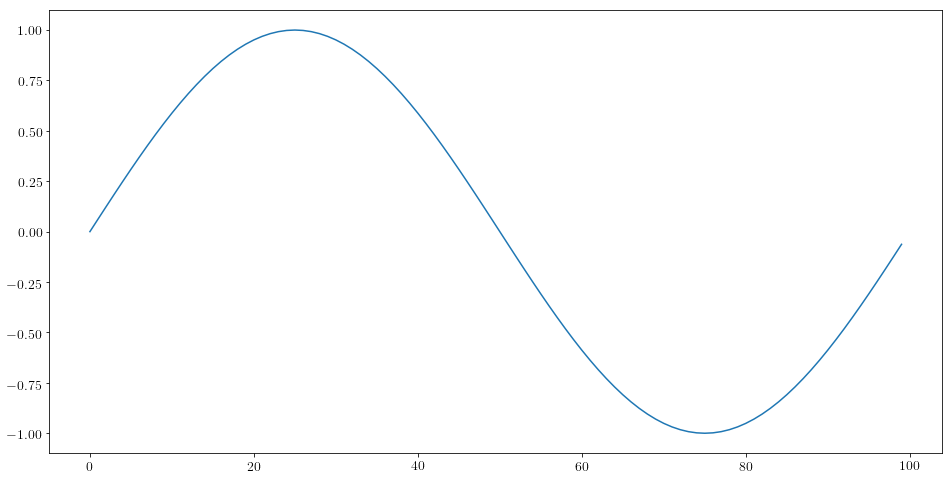

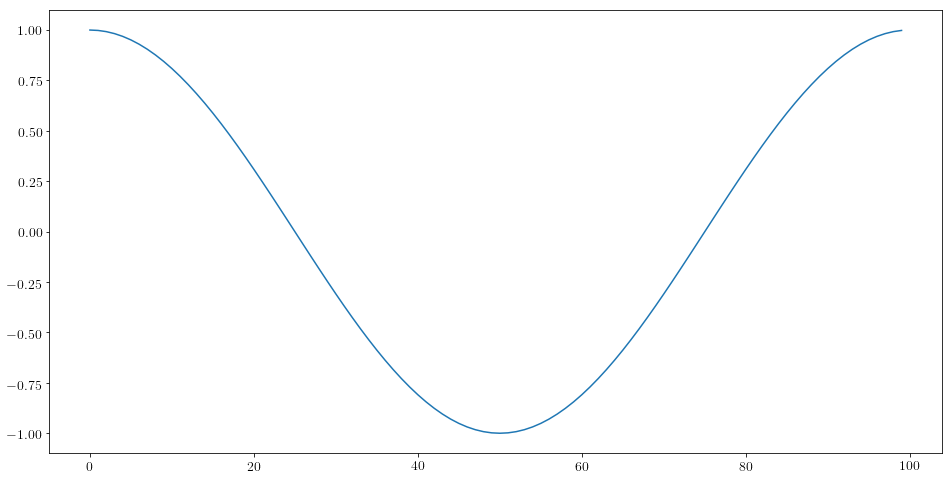

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from latex_envs.latex_envs import figcaption
from numpy import pi, sin, cos,arange
figcaption("This is a nice sine wave", label="fig:mysin")
plt.plot(sin(2*pi*0.01*arange(100)))
plt.show()
figcaption("This is a nice cosine wave", label="fig:mycos")
plt.plot(cos(2*pi*0.01*arange(100)))
plt.show()


Sine wave is shown in fig \label{fig:mysin} and cosine in \label{fig:mycos}.

## Other features

- As shown in the examples, eg \ref{example:mixing} (or just below), **it is possible to mix LaTeX and markdown markup in environments**
- Support for **line-comments**: lines beginning with a % will be masked when rendering 
- Support for **linebreaks**: `\par_`, where \_ denotes any space, tab, linefeed, cr, is replaced by a linebreak 

- Environments can be nested. egg:
\begin{listing}
This is an example of nested environments, with equations inside\\
\begin{proof} Demo
% This is a comment
\begin{enumerate}
\item $$ \left\{ p_1, p_2, p_3 \ldots p_n \right\} $$
\item A **nested enumerate**
\item second item 
\begin{enumerate}
\item $ \left\{ p_1, p_2, p_3 \ldots p_n \right\} $
\item And *another one*
\item second item 
\begin{enumerate}
\item $$ \left\{ p_1, p_2, p_3 \ldots p_n \right\} $$
\item second item 
\end{enumerate}
\end{enumerate}
\end{enumerate}
\end{proof}
\end{listing}
which results in


This is an example of nested environments, with equations inside\\
\begin{proof} Demo
% This is a comment
\begin{enumerate}
\item 
\begin{equation}\label{eq:}
\left\{ p_1, p_2, p_3 \ldots p_n \right\}
\end{equation}
$$ \left\{ p_1, p_2, p_3 \ldots p_n \right\} $$
\item A **nested enumerate**
\item second item 
\begin{enumerate}
\item $\left\{ p_1, p_2, p_3 \ldots p_n \right\}$
\item And *another one*
\item second item 
\begin{enumerate}
\item $$ \left\{ p_1, p_2, p_3 \ldots p_n \right\} $$
\item second item 
\end{enumerate}
\end{enumerate}
\end{enumerate}
\end{proof}

## User interface

### Buttons on main toolbar

On the main toolbar, the extension provides three buttons ![three buttons](main_toolbar.png) The first one can be used to refresh the numerotation of equations and references in all the document. The second one fires the reading of the bibliography bibtex file and creates (or updates) the reference section. Finally the third one is a toogle button that opens or closes the configuration toolbar.

### Configuration toolbar

The configuration toolbar  ![configuration toolbar](config_toolbar.png) enables to enter some configuration options for the extension. 

First, the `LaTeX\_envs` title links to this documentation. Then, the bibliography text input can be used to indicate the name of the bibtex file. If this file is not found and the user creates the reference section, then this section will indicate that the file was not found. The `References` drop-down menu enables to choose the type of reference calls. The Equations input box enables to initiate numbering of equations at the given number (this may be useful for complex documents in several files/parts). The `Equations` drop-down menu let the user choose to number equation or to display their label instead. The two next buttons enable to toogle display of the LaTeX\_envs environments insertion menu or to toggle the displau of LaTeX labels. Finally The `Toogles` dropdown menu enable to toogle the state of several parameters. All these configuration options are then stored in the notebook's metadata (and restored on reload).

The `Toggles` dropdown menu 
![Toggles](Toggles.png)

enables to toggle the state of several configuration options:

- display the `LaTeX_envs` insertion menu or not,
- show labels anchors,
- use $\LaTeX$ user own LaTeX defintions (loads `latexdefs.tex` file from current document directory),
- load user's environments configuration (file `user_envs.json` in `nbextensions/latex_envs` directory),
- select "report style" numbering of environments


### The `LaTeX_envs` insertion menu
The `LaTeX_envs` insertion menu
![LaTeX_envs_menu](LaTeX_envs_menu.png)
enables a quick insertion of LaTeX environments, some with a keyboard shorcut (this can be customized in `envsLatex.js`). Besides, selected text will be inserted in the environment. 

# Conversion to LaTeX and HTML

The extension works in the live-notebook. Since it relies on a bunch of javascript, the notebook does not render as is in services such as `nbviewer` or `github` viewer. Similarly, `nbconvert` does not know of the LaTeX constructs which are used here and therefore does not fully convert notebooks using this extension. 

Therefore, we provide specialized templates and exporters to achieve these conversions. 

## Conversion to html
We provide a template `latex_envs.tpl` and an exporter class `LenvsHTMLExporter` (in library `latex_envs.py`). Using that class, conversion simply amounts to
```
jupyter nbconvert --to latex_envs.LenvsHTMLExporter FILE.ipynb
```
A shortcut is also provided 
```
jupyter nbconvert --to html_with_lenvs FILE.ipynb
```
It should be noted that the rendering is done exactly in the same way as in the livenotebook. Actually, it is the very same javascript which is run in the html file. The javascript functions are available on the extension github as well as in the `jupyter_notebook_extensions` CDN, which means that the rendering of the html files requires an internet connection (this is also true for the rendering of equations with MathJax).

Another template `latex_envs_toc.tpl` is provided which enables to also 
keep the toc2 features when exporting to html (*it even works if you do not have the `toc2` extension!*):
```bash
jupyter nbconvert --to html_with_toclenvs FILE.ipynb
```
**If you use the version included in the jupyter_notebook_extensions collection**, the entry-points (conversion shortcuts) are a little different: use instead

-  
```
jupyter nbconvert --to html_lenvs FILE.ipynb
```
- 
```
jupyter nbconvert --to html_toclenvs FILE.ipynb
```

## Conversion to LaTeX

We provide two templates `thmsInNb_article.tplx` and `thmsInNb_report.tplx` for article and report styles respectively. Anyway one can also use the standard article, report, book templates provided with nbconvert. Simply, we have improved some of the internals styles. More importantly, we provide an exporter class `LenvsLatexExporter` (also in library `latex_envs.py`). Using that class, conversion simply amounts to
```
jupyter nbconvert --to latex_envs.LenvsLatexExporter FILE.ipynb
```
A shortcut is also provided 
```
jupyter nbconvert --to latex_with_lenvs FILE.ipynb
```
In addition, we provide several further options:

-  **removeHeaders**: Remove headers and footers, (default false)
-  **figcaptionProcess**: Process figcaptions, (default true)
- **tocrefRemove** Remove tocs and ref sections, + some cleaning, (default true), 

These options can be specified on the command line as, eg, 
```
jupyter nbconvert --to latex_with_lenvs --LenvsLatexExporter.removeHeaders=True -- LenvsLatexExporter.tocrefRemove=False FILE.ipynb
```

**If you use the version included in the jupyter_notebook_extensions collection**, the entry-points (conversion shortcuts) are a little different: use instead
```
jupyter nbconvert --to latex_lenvs FILE.ipynb
```

\begin{example}
As for an example, the present document has been converted using   
```
jupyter nbconvert --to latex_with_lenvs --LenvsLatexExporter.removeHeaders=True latex_env_doc.ipynb
```
    
Then the resulting file (without header/footer) has been included in the main file `documentation.tex`, where some LaTeX definitions of environments are done (namely listings, colors, etc) and compiled using 

- `xelatex -interaction=nonstopmode documentation`
- `bibTeX documentation`
- `xelatex -interaction=nonstopmode documentation`
   
The output can be consulted [here](documentation.pdf).    
\end{example}

# Installation

The extension consists in a package that includes a javascript notebook extension. Since Jupyter 4.2, this is the recommended way to distribute nbextensions. The extension can be installed

- from the master version on the github repo (this will be always the most recent version)
- via pip for the version hosted on Pypi
- as part of the great [Jupyter-notebook-extensions](https://github.com/ipython-contrib/Jupyter-notebook-extensions) collection. Follow the instructions there for installing. Once this is done, you can open a tab at  `http://localhost:8888/nbextensions` to enable and configure the various extensions. 

From the github repo or from Pypi, 

- **step 1**: install the package
     - `pip3 install https://github.com/jfbercher/jupyter_latex_envs/archive/master.zip [--user][--upgrade]`
     -  <span style="color:blue"> or</span> `pip3 install jupyter_latex_envs [--user][--upgrade]`
     - <span style="color:blue"> or</span> clone the repo and install
   ```
   git clone https://github.com/jfbercher/jupyter_latex_envs.git
   python3 setup.py install
   ```
   
   
With Jupyter >= 4.2,

- **step 2**: install the notebook extension 
```
jupyter nbextension install --py latex_envs [--user]
```

-  **step 3**: and enable it
```
jupyter nbextension enable latex_envs [--user] --py
```

For Jupyter versions before 4.2, the situation is more tricky since you will have to find the location of the source files (instructions from @jcb91 found [here](https://github.com/jcb91/jupyter_highlight_selected_word)): execute 
```
python -c "import os.path as p; from jupyter_highlight_selected_word import __file__ as f, _jupyter_nbextension_paths as n; print(p.normpath(p.join(p.dirname(f), n()[0]['src'])))"
```
Then, issue 
```
jupyter nbextension install <output source directory>
jupyter nbextension enable latex_envs/latex_envs
```
where `<output source directory>` is the output of the python command.  

# Customization

## Configuration parameters

Some configuration parameters can be specified system-wide, using the `nbextension_configurator`. For that, open a browser at [http://localhost:8888/nbextensions/](http://localhost:8888/nbextensions/) -- the exact address may change eg if you use jupyterhub or if you use a non standard port. You will then be able to change default values for the boolean values
- LaTeX_envs menu (insert environments) present
- Label equation with numbers (otherwise with their \label{} key)
- Number environments as section.num
- Use customized environments as given in 'user_envs.json' (in the extension directory)
and enter a default filename for the bibtex file (in document directory). 

All these values can also be changed per documents and these values are stored in the notebook's metadata. 


## User environments configuration

Environments can be customized in the file `user_envs.json`, located in the `nbextensions/latex_envs` directory. It is even possible to add *new* environments. This file is read at startup (or when using the corresponding toggle option in the `Toggles` menu) and merged with the standard configuration. An example is provided as `example_user_envs.json`. For each (new/modified) environment, one has to  provide (i) the name of the environment (ii) its title (iii) the name of the associated counter for numbering it; eg
```
    "myenv": {
        "title": "MyEnv",
        "counterName": "example"
    },
```    
Available counters are problem, exercise, example, property, theorem, lemma, corollary, proposition, definition, remark, and figure. 

## Styling 
The document title and the document author (as specified by `\title` and `\author` are formatted using the `maketitle` command according to the `.latex_maintitle` and `.latex_author` div styles.

Each environment is formatted according to the div style `.latex_environmentName`, e.g. `.latex_theorem`, `.latex_example`, etc. The titles of environments are formatted with respect to `.latex_title` and the optional parameter wrt `.latex_title_opt`. 
Images are displayed using the style specified by `.latex_img` and thir caption using `.caption`. 
Finally, enumerate environments are formatted according to the `.enum` style. Similarly, itemize environments are formatted using `.item` style.  

These styles can be customized either in the `latex_envs.css` file, or better in a `custom.css` in the document directory. 

# Usage and further examples

## First example (continued)

We continue the first example on fthe Fourier transform definition \ref{def:FT} in order to show that, of course, we can illustrate things using a simple code. Since the Fourier transform is an essential tool in signal processing, We put this in evidence using the `textboxa` environment -- which is defined here in the css, and that one should define in the LaTeX counterpart:
\begin{listing}
\begin{textboxa}
The Fourier transform is an extremely useful tool to have in your toolbox!
\end{textboxa}
\end{listing}

\begin{textboxa}
The Fourier transform is an extremely useful tool to have in your toolbox!
\end{textboxa}


The Fourier transform of a pure cosine is given by 
$$
X[k] = \frac{1}{2} \left( \delta[k-k_0] + \delta[k-k_0] \right), 
$$
modulo $N$. This is illustrated in the following simple script:

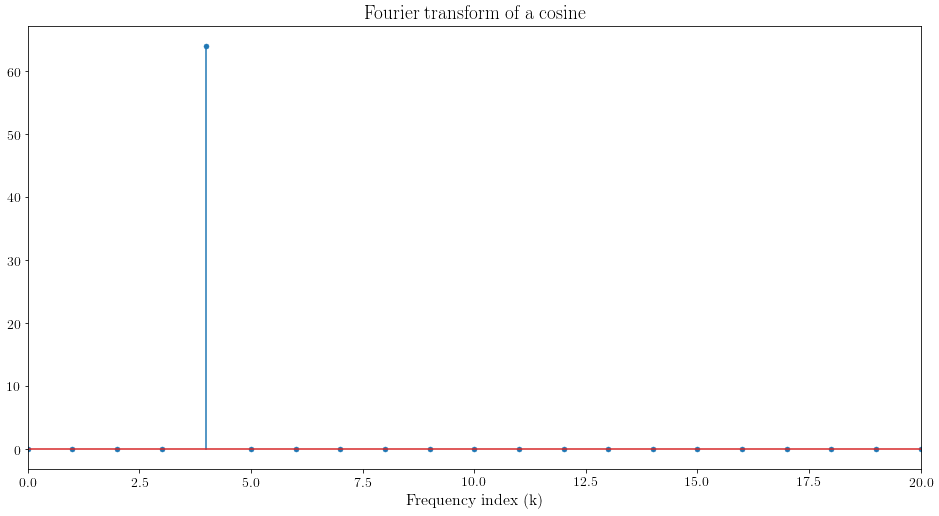

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from numpy.fft import fft
k0=4; N=128; n=np.arange(N); k=np.arange(N)
x=np.sin(2*np.pi*k0*n/N)
X=fft(x)
plt.stem(k,np.abs(X))
plt.xlim([0, 20])
plt.title("Fourier transform of a cosine")
_=plt.xlabel("Frequency index (k)")

## Second example

This example shows a series of environments, with different facets; **links, references, markdown or/and LaTeX formatting within environments**.  The listing of environments below is typed using the environment *listing*...

\begin{listing}
\begin{definition} \label{def:diffeq}
We call \textbf{difference equation} an equation of the form
$$
\label{eq:diffeq}
y[n]= \sum_{k=1}^{p} a_k y[n-k] + \sum_{i=0}^q b_i x[n-i]
$$
\end{definition}

\begin{property}
If all the $a_k$ in equation (\ref{eq:diffeq}) of definition \ref{def:diffeq} are zero, then the filter has a **finite impulse response**. 
\end{property}

\begin{proof}
Let $\delta[n]$ denote the Dirac impulse. Take $x[n]=\delta[n]$ in (\ref{eq:diffeq}). This yields, by definition, the impulse response:
$$
\label{eq:fir}
h[n]= \sum_{i=0}^q b_i \delta[n-i],
$$
which has finite support. 
\end{proof}

\begin{theorem}
The poles of a causal stable filter are located within the unit circle in the complex plane.
\end{theorem}

\begin{example} \label{ex:IIR1}
Consider $y[n]= a y[n-1] +  x[n]$. The pole of the transfer function is $z=a$. The impulse response $h[n]=a^n$ has infinite support.
\end{example}

In the following exercise, you will check that the filter is stable iff $a$<1.

\begin{exercise}\label{ex:exofilter}
Consider the filter defined in Example \ref{ex:IIR1}. Using the **function** `lfilter` of scipy, compute and plot the impulse response for several values of $a$.
\end{exercise}

\end{listing}

The lines above are rendered as follows (of course everything can be tailored in the stylesheet):
%
\begin{definition} \label{def:diffeq}
We call \textbf{difference equation} an equation of the form
\begin{equation}
\label{eq:diffeq}
y[n]= \sum_{k=1}^{p} a_k y[n-k] + \sum_{i=0}^q b_i x[n-i]
\end{equation}
\end{definition}
%
Properties of the filter are linked to the coefficients of the difference equation. For instance, an immediate property is 
%
% this is a comment
\begin{property}
If all the $a_k$ in equation (\ref{eq:diffeq}) of definition \ref{def:diffeq} are zero, then the filter has a **finite impulse response**. 
\end{property}
%
\begin{proof}
Let $\delta[n]$ denote the Dirac impulse. Take $x[n]=\delta[n]$ in (\ref{eq:diffeq}). This yields, by definition, the impulse response:
\begin{equation}
\label{eq:fir}
h[n]= \sum_{i=0}^q b_i \delta[n-i],
\end{equation}
which has finite support. 
\end{proof}
%
\begin{theorem}
The poles of a causal stable filter are located within the unit circle in the complex plane.
\end{theorem}
%
\begin{example} \label{ex:IIR1}
Consider $y[n]= a y[n-1] +  x[n]$. The pole of the transfer function is $z=a$. The impulse response $h[n]=a^n$ has infinite support.
\end{example}

In the following exercise, you will check that the filter is stable iff $a$<1.
%
\begin{exercise}\label{ex:exofilter}
Consider the filter defined in Example \ref{ex:IIR1}. Using the **function** `lfilter` of scipy, compute and plot the impulse response for several values of $a$.
\end{exercise}



\begin{listing}
The solution of exercise \ref{ex:exofilter}, which uses a difference equation as in Definition \ref{def:diffeq}:
\end{listing}
The solution of exercise \ref{ex:exofilter}, which uses a difference equation as in Definition \ref{def:diffeq}:

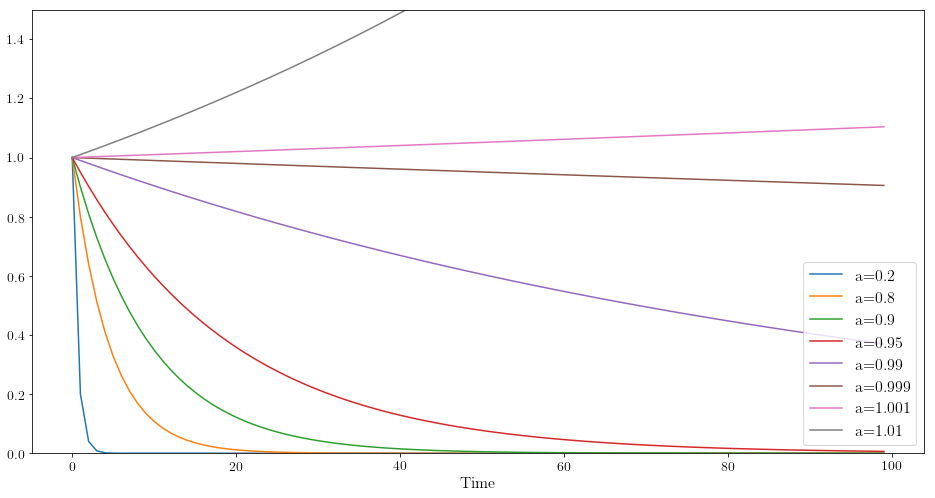

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import lfilter
d=np.zeros(100); d[0]=1 #dirac impulse
alist=[0.2, 0.8, 0.9, 0.95, 0.99, 0.999, 1.001, 1.01]
for a in alist:
    h=lfilter([1], [1, -a],d)
    _=plt.plot(h, label="a={}".format(a))
plt.ylim([0,1.5])
plt.xlabel('Time')
_=plt.legend()

## Third example:

This example shows that environments like itemize or enumerate are also available. As already indicated, this is useful for copying text from a TeX file. Following the same idea, text formating commands `\textit`, `\textbf`, `\underline`, etc are also available.

\begin{listing}
The following \textit{environments} are available:
\begin{itemize}
    \item \textbf{Theorems and likes}
    \begin{enumerate}
        \item theorem,
        \item lemma,
        \item corollary
        \item ...
    \end{enumerate}
    \item \textbf{exercises}
    \begin{enumerate}
        \item problem,
        \item example,
        \item exercise
    \end{enumerate}
\end{itemize}
\end{listing}

which gives... 

The following \textit{environments} are available:
\begin{itemize}
\item \textbf{Theorems and likes}
\begin{enumerate}
\item theorem,
\item lemma,
\item corollary
\item ...
\end{enumerate}
\item \textbf{exercises}
\begin{enumerate}
\item problem,
\item example,
\item exercise
\end{enumerate}
\end{itemize}

# Disclaimer, sources and thanks

Originally, I used a piece of code from the nice online markdown editor `stackedit` [https://github.com/benweet/stackedit/issues/187](https://github.com/benweet/stackedit/issues/187), where the authors also considered the problem of incorporating LaTeX markup in their markdown. 

I also studied and used examples and code from [https://github.com/ipython-contrib/IPython-notebook-extensions](https://github.com/ipython-contrib/IPython-notebook-extensions).

- This is done in the hope it can be useful. However there are many impovements possible, in the code and in the documentation. 
**Contributions will be welcome and deeply appreciated.** 

- If you have issues, please post an issue at 
`https://github.com/jfbercher/jupyter_latex_envs/issues` [here](https://github.com/jfbercher/jupyter_latex_envs/issues). 

**Self-Promotion --** Like `latex_envs`? Please star and follow the [repository](https://github.com/jfbercher/jupyter_latex_envs) on GitHub. 




# References

(<a id="cit-PER-GRA:2007" href="#call-PER-GRA:2007">P\'erez and Granger, 2007</a>) P\'erez Fernando and Granger Brian E., ``_IPython: a System for Interactive Scientific Computing_'', Computing in Science and Engineering, vol. 9, number 3, pp. 21--29, May 2007.  [online](http://ipython.org)

(<a id="cit-mckinney2012python" href="#call-mckinney2012python">McKinney, 2012</a>) Wes McKinney, ``_Python for data analysis: Data wrangling with Pandas, NumPy, and IPython_'',  2012.

(<a id="cit-rossant2013learning" href="#call-rossant2013learning">Rossant, 2013</a>) Cyrille Rossant, ``_Learning IPython for interactive computing and data visualization_'',  2013.

(<a id="cit-shen2014interactive" href="#call-shen2014interactive">Shen, 2014</a>) Shen Helen, ``_Interactive notebooks: Sharing the code_'', Nature, vol. 515, number 7525, pp. 151--152,  2014.



In [4]:
%%html
<style>
    .prompt{
        display: none;
    }    

</style>